In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_toy.csv')

### Understand the data

In [4]:
df.head(10)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,4,0
8,27.0,11.1333,2,1
9,14.0,30.0708,1,1


In [5]:
df.tail()

,Age,Fare,Family,Survived
886,27.0,13.00,0,0
887,19.0,30.00,0,1
888,NaN,23.45,3,0
889,26.0,NaN,0,1
890,32.0,7.75,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [8]:
df.shape

(891, 4)

In [9]:
df.isnull()

,Age,Fare,Family,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,True,False,False,False
889,False,True,False,False


In [10]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [11]:
df.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [12]:
df.nunique()

Age          88
Fare        242
Family        9
Survived      2
dtype: int64

In [13]:
df['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [14]:
df['Survived'].unique()

array([0, 1])

### Find the correlation

<Axes: >

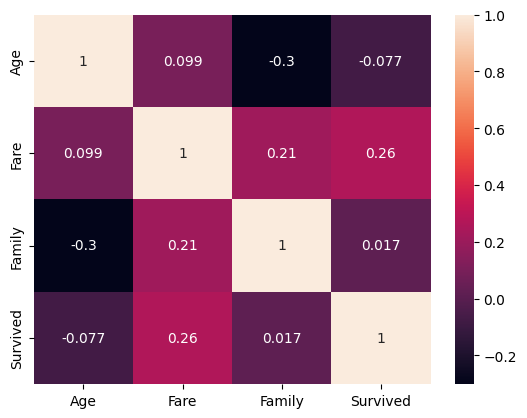

In [15]:
correlaion = df.corr()
sns.heatmap(correlaion, annot=True)

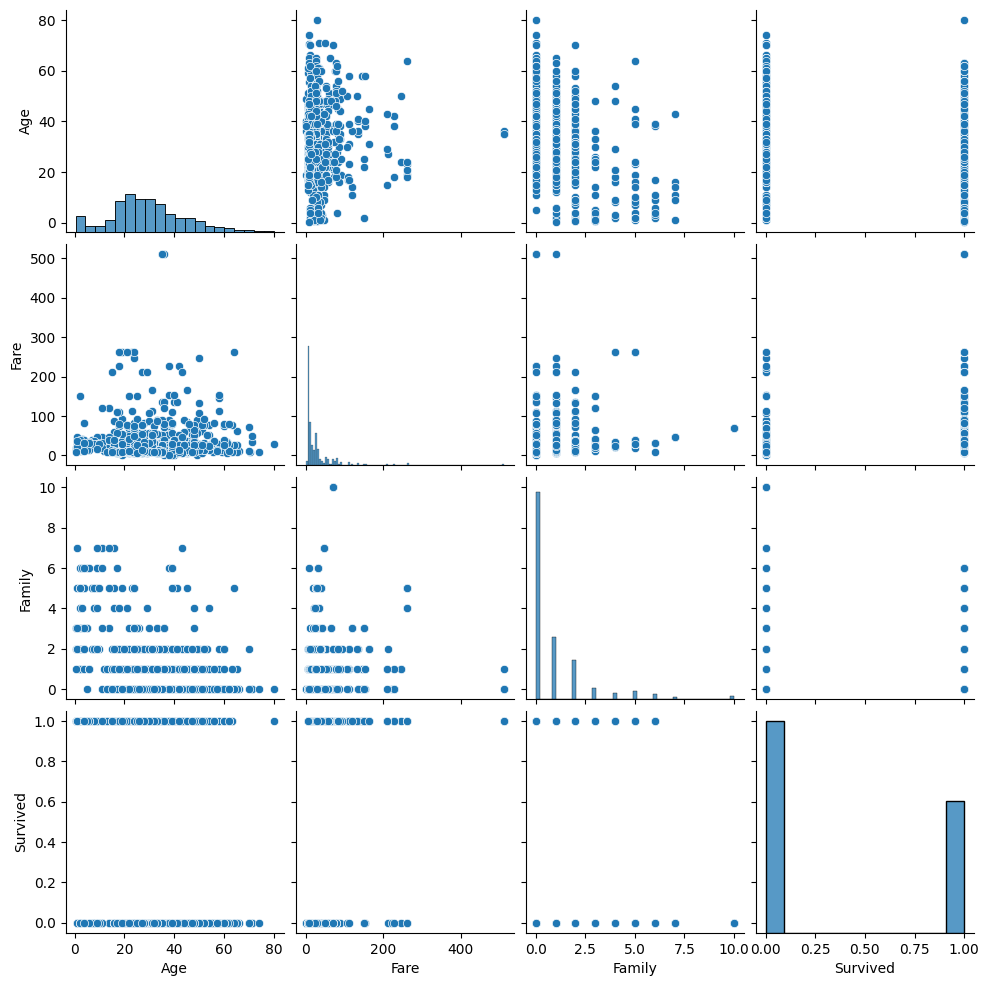

In [16]:
sns.pairplot(df)

### Cleaning the data
##### Handling missing values

In [17]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

##### Calculate mean median mode for age and Fare columns

In [18]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()


In [19]:
Fare_mean = df['Fare'].mean()
Fare_median = df['Fare'].median()
Fare_mode = df['Fare'].mode()


In [20]:
M = [age_mean ,age_median, age_mode, Fare_mean, Fare_median, Fare_mode ]

In [21]:
for i in M:
    print(i)

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64
32.279338297872336
14.4542
0    8.05
Name: Fare, dtype: float64


##### Filling missing values in the "Age" and "Fare" columns of the DataFrame df with the mean, medain and mode values of those respective columns.

In [22]:
df['Imputed_Age_Mean']=df['Age'].fillna(age_mean)
df['Imputed_Age_Median']=df['Age'].fillna(age_median)
df['Imputed_Age_Mode']=df['Age'].fillna(age_mode)
df['Imputed_Fare_Mean']=df['Fare'].fillna(Fare_mean)
df['Imputed_Fare_Median']=df['Fare'].fillna(Fare_median)
df['Imputed_Fare_Mode']=df['Fare'].fillna(Fare_mode)

In [23]:
df

,Age,Fare,Family,Survived,Imputed_Age_Mean,Imputed_Age_Median,Imputed_Age_Mode,Imputed_Fare_Mean,Imputed_Fare_Median,Imputed_Fare_Mode
0,22.0,7.2500,1,0,22.000000,22.0,22.0,7.250000,7.2500,7.2500
1,38.0,71.2833,1,1,38.000000,38.0,38.0,71.283300,71.2833,71.2833
2,26.0,7.9250,0,1,26.000000,26.0,26.0,7.925000,7.9250,7.9250
3,35.0,53.1000,1,1,35.000000,35.0,35.0,53.100000,53.1000,53.1000
4,35.0,8.0500,0,0,35.000000,35.0,35.0,8.050000,8.0500,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,27.000000,27.0,27.0,13.000000,13.0000,13.0000
887,19.0,30.0000,0,1,19.000000,19.0,19.0,30.000000,30.0000,30.0000
888,NaN,23.4500,3,0,29.699118,28.0,NaN,23.450000,23.4500,23.4500
889,26.0,NaN,0,1,26.000000,26.0,26.0,32.279338,14.4542,NaN


#####  Creating visualizations to compare the distribution of the original columns with the imputed columns for the mean values.


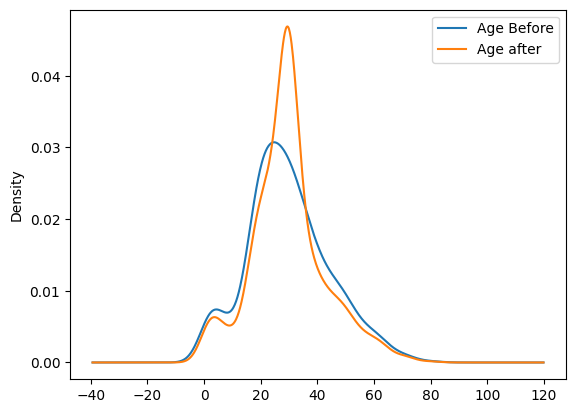

In [24]:
df['Age'].plot(kind='kde', label='Age Before')
df['Imputed_Age_Mean'].plot(kind='kde',label="Age after")
plt.legend()

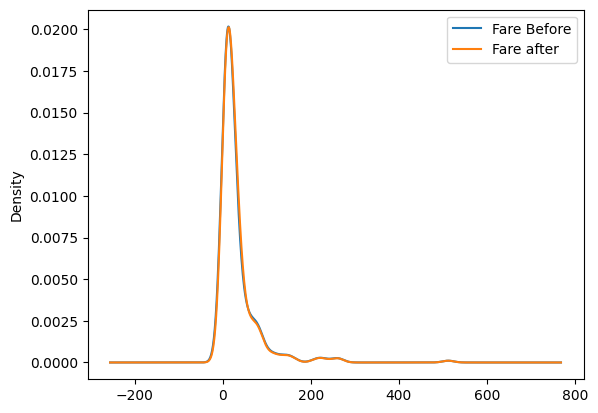

In [25]:
df['Fare'].plot(kind='kde', label='Fare Before')
df['Imputed_Fare_Mean'].plot(kind='kde',label="Fare after")
plt.legend()

- Creating visualizations to compare the distribution of the original columns with the imputed columns for the median values.

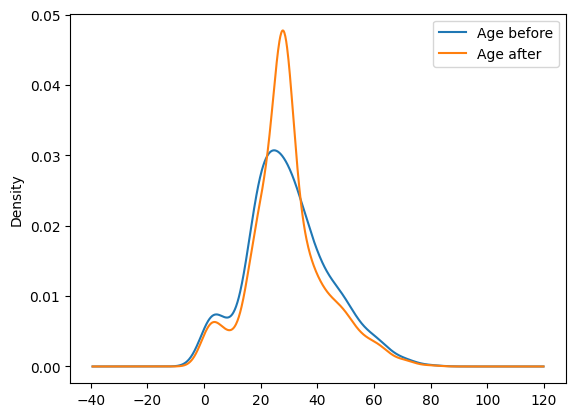

In [26]:
df['Age'].plot(kind='kde',label="Age before")
df['Imputed_Age_Median'].plot(kind='kde',label="Age after")
plt.legend()


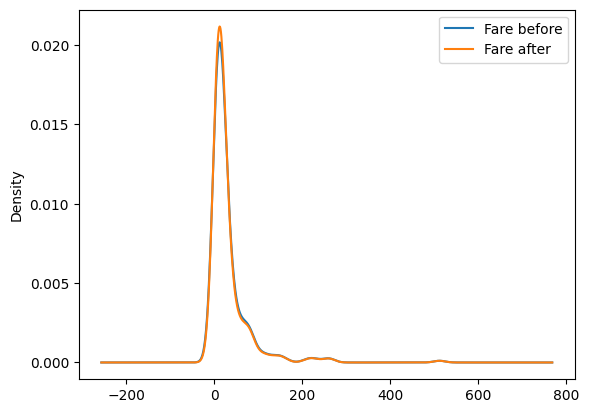

In [27]:
df['Fare'].plot(kind='kde',label="Fare before")
df['Imputed_Fare_Median'].plot(kind='kde',label="Fare after")
plt.legend()


##### Creating visualizations to compare the distribution of the original columns with the imputed columns for the mode values.

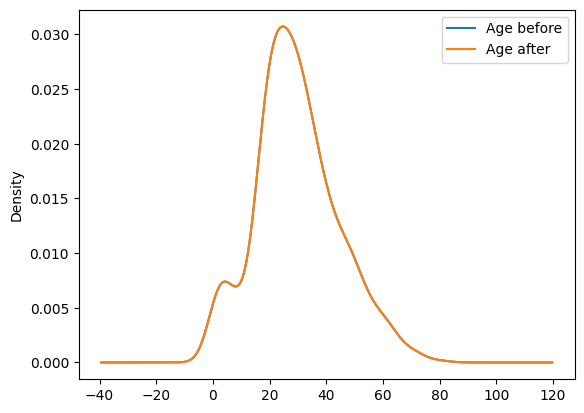

In [28]:
df['Age'].plot(kind='kde',label="Age before")
df['Imputed_Age_Mode'].plot(kind='kde',label="Age after")
plt.legend()

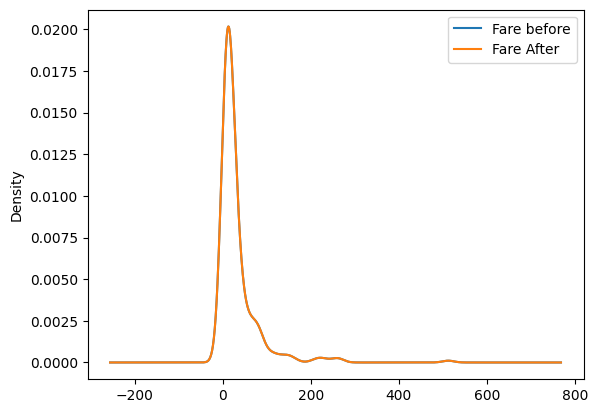

In [29]:
df['Fare'].plot(kind='kde',label="Fare before")
df['Imputed_Fare_Mode'].plot(kind='kde',label="Fare After")
plt.legend()

##### Conclusion: For Age  we will choose Mode as it perfectly fits the curve and for Fare we will choose median or mode as they both are same


In [30]:
correlaion = df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15620\3674826467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Imputed_Age_Mean'])


<Axes: xlabel='Imputed_Age_Mean', ylabel='Density'>

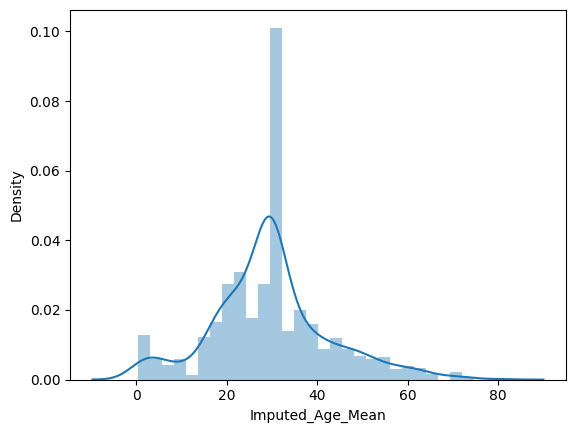

In [31]:
sns.distplot(df['Imputed_Age_Mean'])

<Axes: xlabel='Imputed_Fare_Mean', ylabel='Count'>

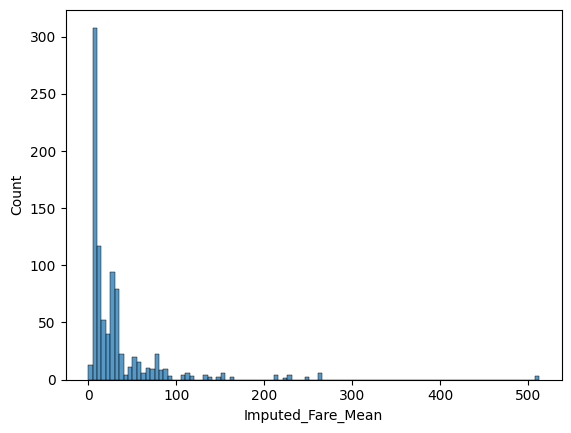

In [32]:
sns.histplot(df['Imputed_Fare_Mean'])

<Axes: xlabel='Age'>

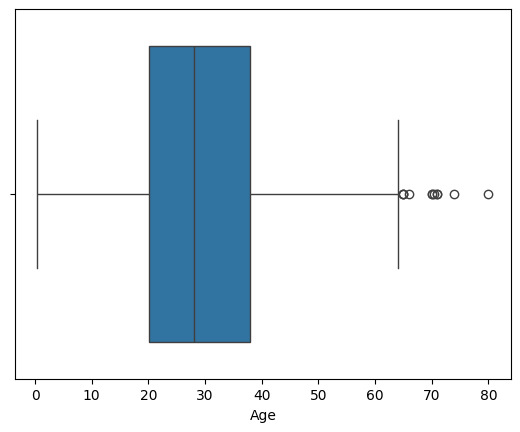

In [33]:
sns.boxplot(x='Age', data=df)

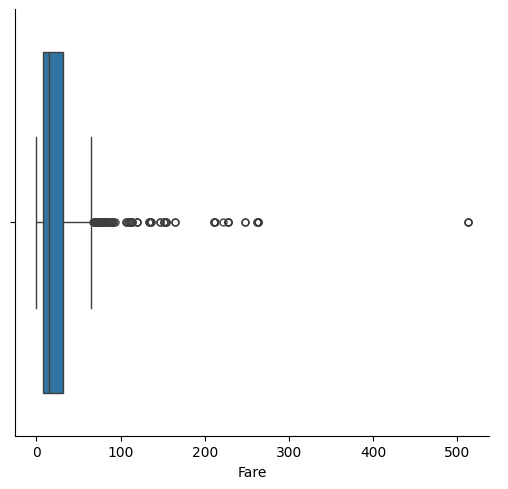

In [34]:
sns.catplot(x='Fare',kind='box', data=df)